<a href="https://colab.research.google.com/github/riya461/Learn_ML/blob/main/Maths/Jacobian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:

# Define the function
def f(x, y, z):
    return x**2 + 3 * tf.exp(y * z) + tf.cos(x) * tf.sin(z)


# Define the input variables as tensors
x = tf.constant(2.0)
y = tf.constant(3.0)
z = tf.constant(4.0)

# Compute the Jacobian
with tf.GradientTape(persistent=True) as tape:
    # Ensure all operations are being watched
    tape.watch([x, y, z])
    # Compute the function value
    func = f(x, y, z)

# Compute the gradients with respect to each variable
Jacobian_matrix = tape.jacobian(func, [x, y, z])

# Print the Jacobian matrix
print("Input matrix: ", [x, y, z])
print("Jacobian matrix:")
print(Jacobian_matrix)


Input matrix:  [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, <tf.Tensor: shape=(), dtype=float32, numpy=4.0>]
Jacobian matrix:
[<tf.Tensor: shape=(), dtype=float32, numpy=4.6881585>, <tf.Tensor: shape=(), dtype=float32, numpy=1953057.5>, <tf.Tensor: shape=(), dtype=float32, numpy=1464793.4>]


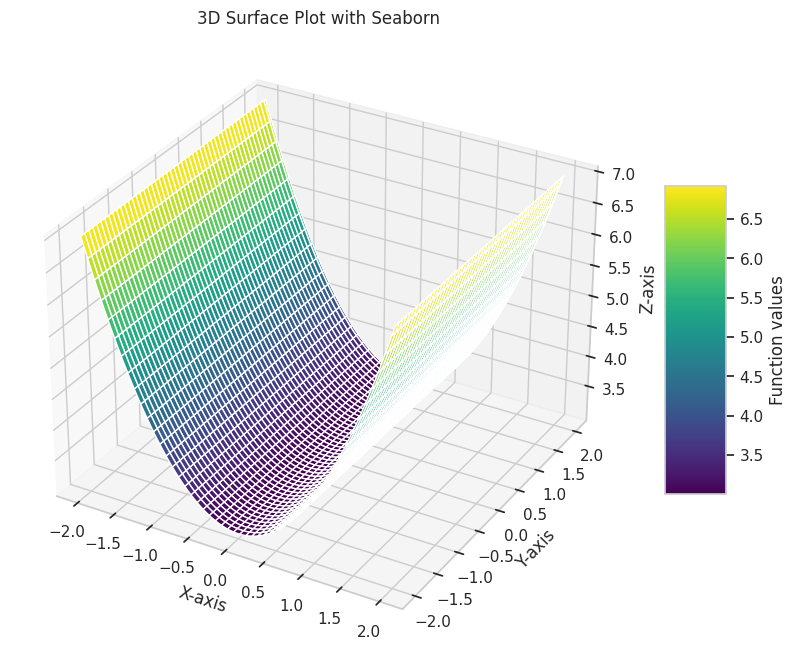

In [57]:

from mpl_toolkits.mplot3d import Axes3D

# Set Seaborn style
sns.set(style='whitegrid')
# Define the range for x and y
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)

# Create a meshgrid for x and y values
X, Y = np.meshgrid(x_values, y_values)

# Convert meshgrid to TensorFlow tensors
X_tf = tf.convert_to_tensor(X, dtype=tf.float32)
Y_tf = tf.convert_to_tensor(Y, dtype=tf.float32)
Z_tf = tf.zeros_like(X_tf)  # Set Z to zero for simplicity

# Compute Z values using TensorFlow
Z = f(X_tf, Y_tf, Z_tf)

# Convert TensorFlow tensor to NumPy array for plotting
Z = Z.numpy()

# Create a 3D surface plot with Seaborn styling
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Add color bar
cbar = plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Function values')

# Add title
plt.title('3D Surface Plot with Seaborn')

plt.show()